# DATA MINING - GRUPPO 2
## Diabets dataset
The aim of this project is to create a model to predict if
a patient will be readmitted or not after a specific encounter.

The first thing is to import the dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
plt.style.use('ggplot')

df = pd.read_csv("dataset_diabetes/diabetic_data.csv", low_memory=False, delimiter=',', na_values='?')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


The dataset contains 101766 records with 50 columns. The columns
are:

In [2]:
print(df.columns.to_list())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


let's unify the '> 30' and 'no' class value

In [3]:
def unify_value(x: pd.Series) -> pd.Series:
    if x['readmitted'] == '>30':
        x['readmitted'] = 'NO'
    return x

df = df.apply(unify_value, axis=1)


Some columns contains null values, in particular

In [4]:
df.isna().apply(lambda x: f'{round((sum(x) / df.shape[0]) * 100, 1)}%')

encounter_id                 0.0%
patient_nbr                  0.0%
race                         2.2%
gender                       0.0%
age                          0.0%
weight                      96.9%
admission_type_id            0.0%
discharge_disposition_id     0.0%
admission_source_id          0.0%
time_in_hospital             0.0%
payer_code                  39.6%
medical_specialty           49.1%
num_lab_procedures           0.0%
num_procedures               0.0%
num_medications              0.0%
number_outpatient            0.0%
number_emergency             0.0%
number_inpatient             0.0%
diag_1                       0.0%
diag_2                       0.4%
diag_3                       1.4%
number_diagnoses             0.0%
max_glu_serum                0.0%
A1Cresult                    0.0%
metformin                    0.0%
repaglinide                  0.0%
nateglinide                  0.0%
chlorpropamide               0.0%
glimepiride                  0.0%
acetohexamide 

Let's check if the 2.2% of null value in race are correlated with the class
label

In [5]:
amount = df[(df['race'].isnull()) & (df['readmitted'] == '<30')].shape[0]
total = df[(df['readmitted'] == '<30')].shape[0]
percentage = ( amount / total) * 100
percentage

1.6553667341727567

There are 188 records with our target class value, so we decide to
maintain them as "not assigned"

In [6]:
df = df.drop(df[df['race'].isnull()].index)

Many of the pathologies reported in the dataset (afferent to the diag columns) are part of disease macrogroups (as indicated by documentation). Consequently, we decided to group them. Particular is the category other, which contains ranges of pathologies not very frequent in the dataset.

Since "weight", "payer_code", "medical_specialty" have a high percentage of null
value, we can remove them

In [7]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])

There are some ids that are equivalent, so we can unify them

In [8]:
def merge_ids(series: pd.Series) -> pd.Series:
    if series['admission_type_id'] == 5 or series['admission_type_id'] == 6:
        series['admission_type_id'] = 8
    if series['discharge_disposition_id'] == 18 or series['discharge_disposition_id'] == 26:
        series['discharge_disposition_id'] = 25
    if series['admission_source_id'] == 9 or series['admission_source_id'] == 15 or series['admission_source_id'] == 17 or series['admission_source_id'] == 21:
        series['admission_source_id'] = 20
    return series

df = df.apply(merge_ids, axis=1)

Some informations about the column type and the null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99493 non-null  int64 
 1   patient_nbr               99493 non-null  int64 
 2   race                      99493 non-null  object
 3   gender                    99493 non-null  object
 4   age                       99493 non-null  object
 5   admission_type_id         99493 non-null  int64 
 6   discharge_disposition_id  99493 non-null  int64 
 7   admission_source_id       99493 non-null  int64 
 8   time_in_hospital          99493 non-null  int64 
 9   num_lab_procedures        99493 non-null  int64 
 10  num_procedures            99493 non-null  int64 
 11  num_medications           99493 non-null  int64 
 12  number_outpatient         99493 non-null  int64 
 13  number_emergency          99493 non-null  int64 
 14  number_inpatient     

Let's fix the types

In [10]:
for attribute in df.columns:
    if df[attribute].dtype == np.object:
        df[attribute] = df[attribute].astype('category')

df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              99493 non-null  int64   
 1   patient_nbr               99493 non-null  int64   
 2   race                      99493 non-null  category
 3   gender                    99493 non-null  category
 4   age                       99493 non-null  category
 5   admission_type_id         99493 non-null  category
 6   discharge_disposition_id  99493 non-null  category
 7   admission_source_id       99493 non-null  category
 8   time_in_hospital          99493 non-null  int64   
 9   num_lab_procedures        99493 non-null  int64   
 10  num_procedures            99493 non-null  int64   
 11  num_medications           99493 non-null  int64   
 12  number_outpatient         99493 non-null  int64   
 13  number_emergency          99493 non-null  int

Since there are two columns with only one possible value, we can drop them

In [11]:
df = df.drop(columns=['examide', 'citoglipton'])

We are not interested in patient number and encounter id

In [12]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

The most frequent value for the categorical attributes are:

In [13]:
info_columns = df.describe(include='category').T
info_columns

,count,unique,top,freq
race,99493,5,Caucasian,76099
gender,99493,3,Female,53575
age,99493,10,[70-80),25469
admission_type_id,99493,6,1,52900
discharge_disposition_id,99493,25,1,58768
admission_source_id,99493,15,7,56632
diag_1,99474,714,428,6739
diag_2,99157,745,276,6638
diag_3,98144,786,250,11227
max_glu_serum,99493,4,None,94203


We can calculate the percentage of frequency, so we can decide
which columns have a very low or very high variability.

The upper bound is set to 99%

In [14]:
upper_bound = 99
lower_bound = 0

info_columns['freq'] = info_columns['freq'].apply(lambda x: round((x / df.shape[0]) * 100, 1))
for info in info_columns.index:
    if info_columns.loc[info]['freq'] > upper_bound or info_columns.loc[info]['freq'] < lower_bound:
        df = df.drop(columns=[info])

The distribution for the numeric attribute

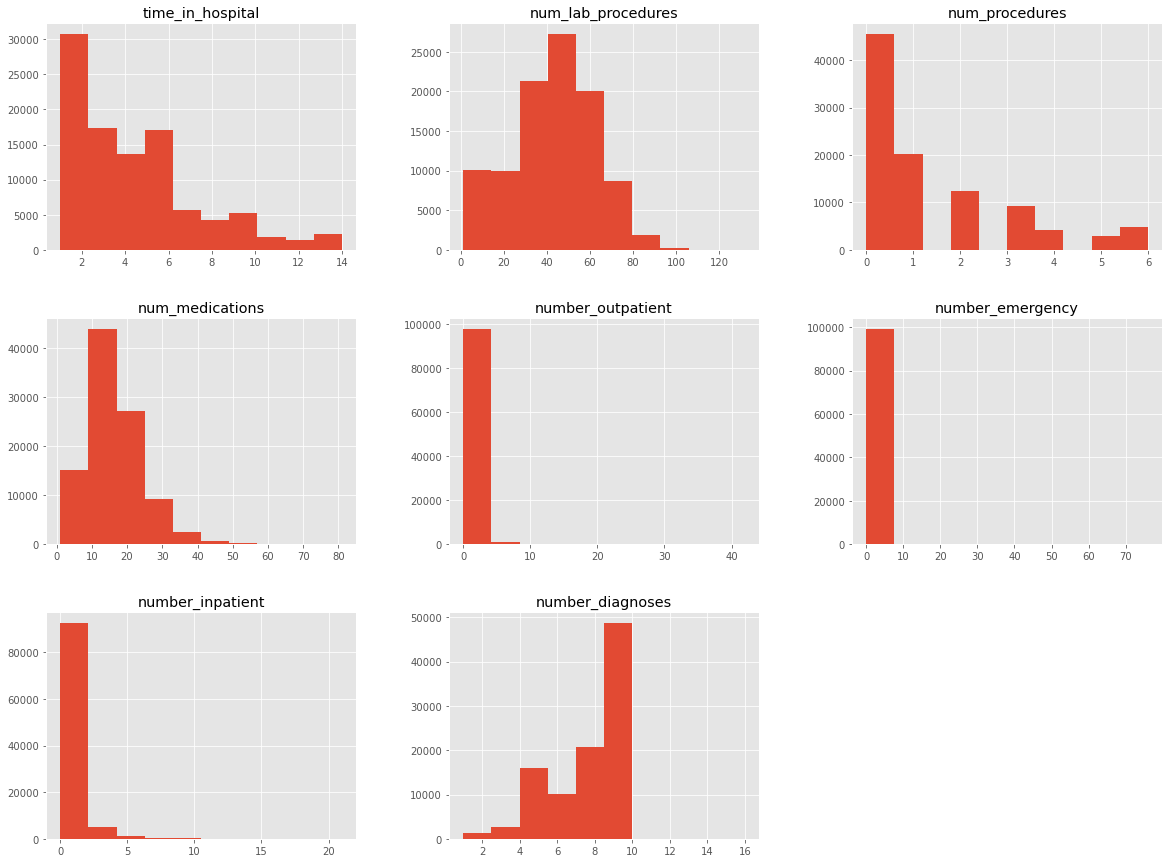

In [15]:
df.select_dtypes(include=['int64']).hist(figsize=(20,15))
plt.show()

About categorical attributes

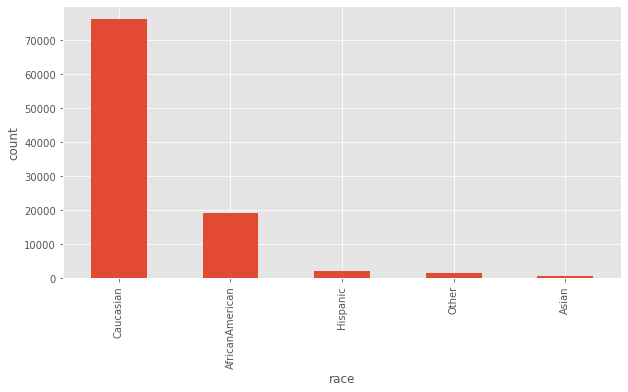

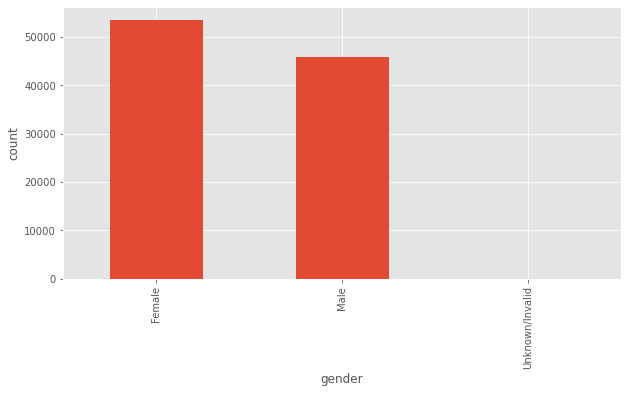

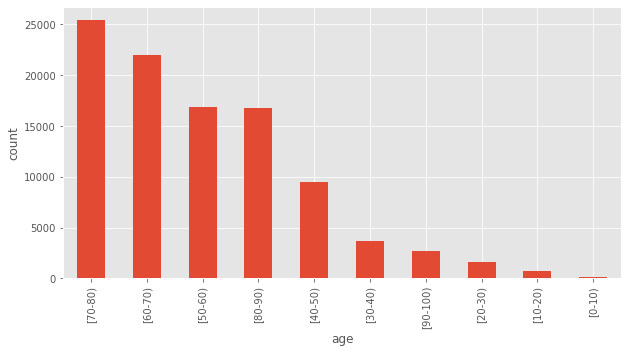

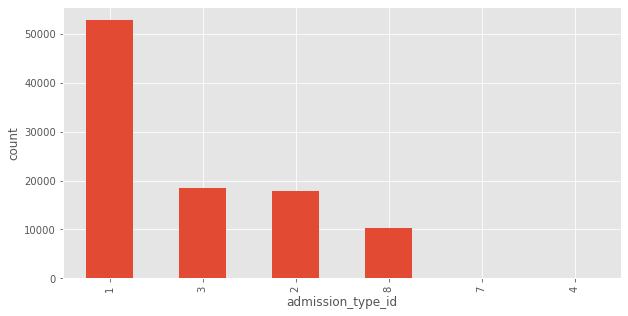

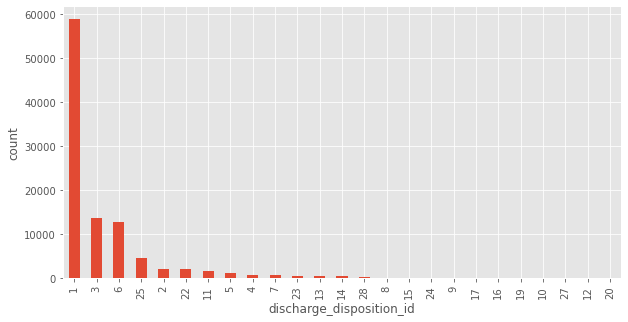

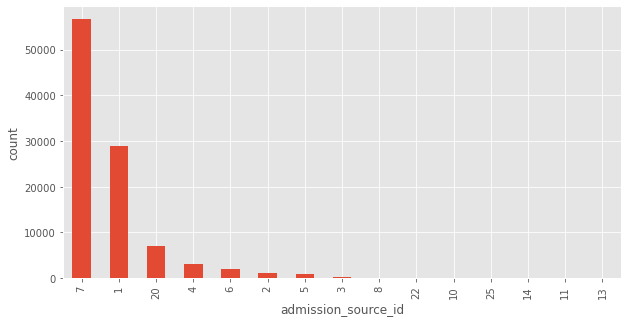

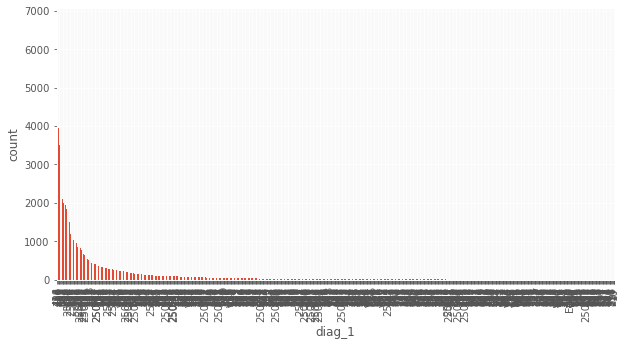

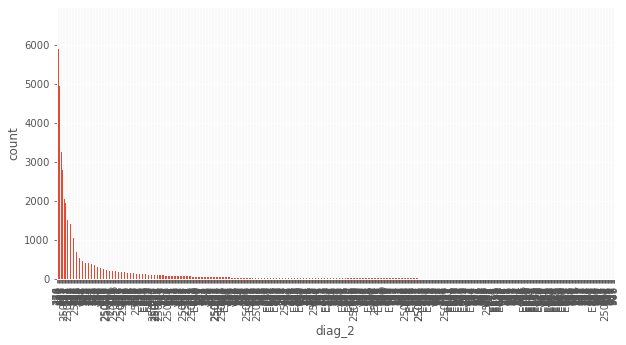

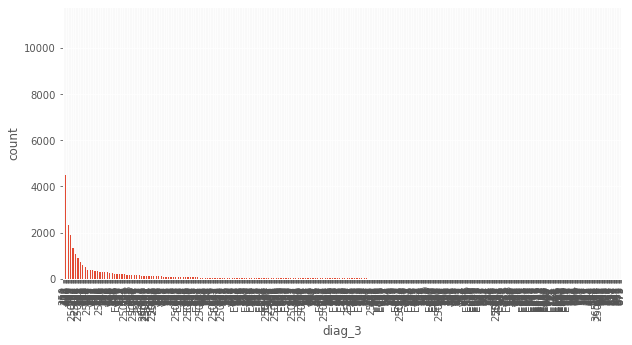

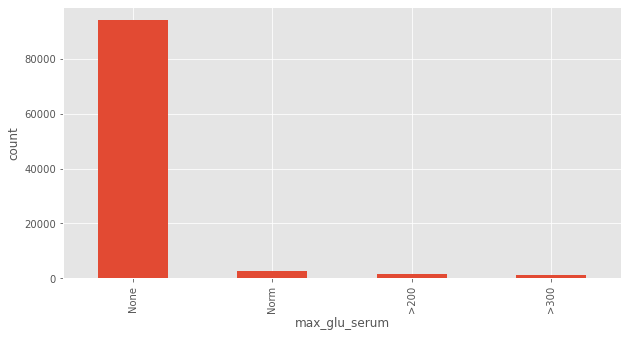

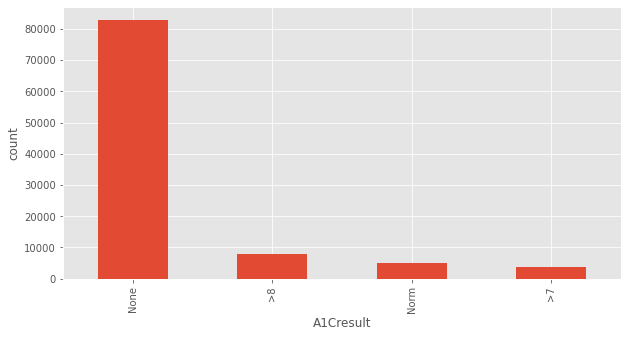

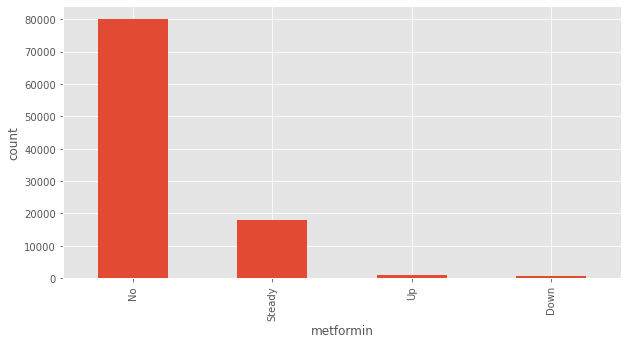

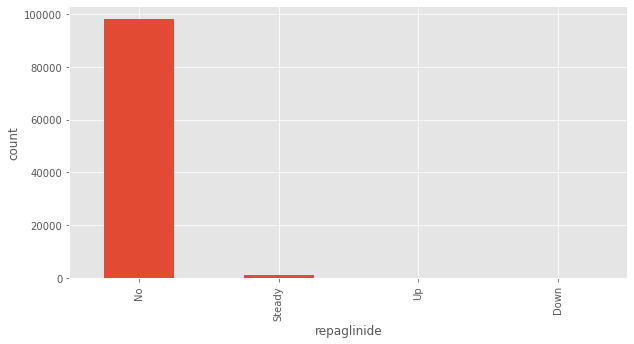

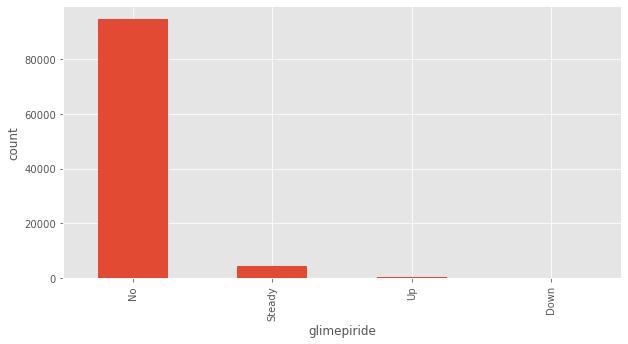

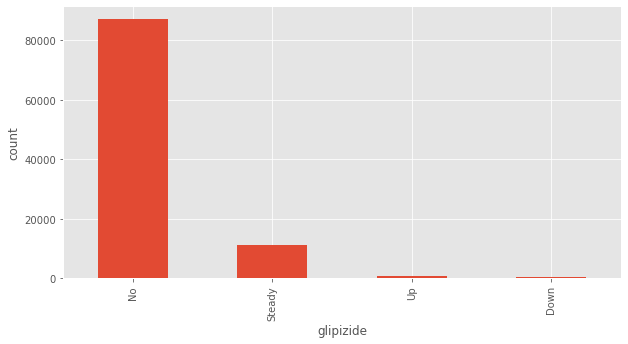

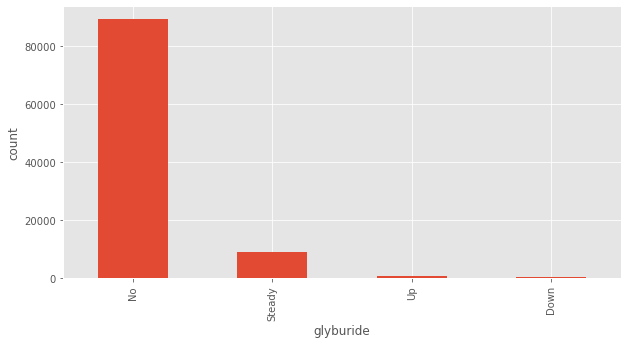

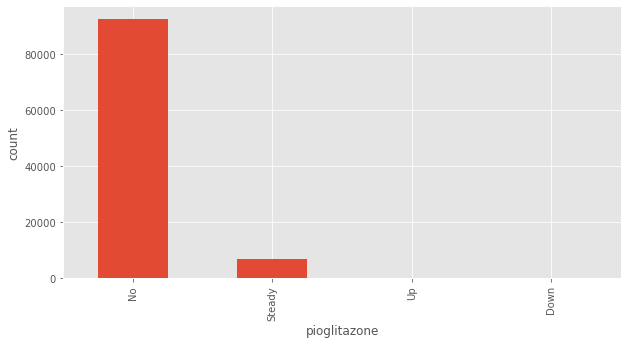

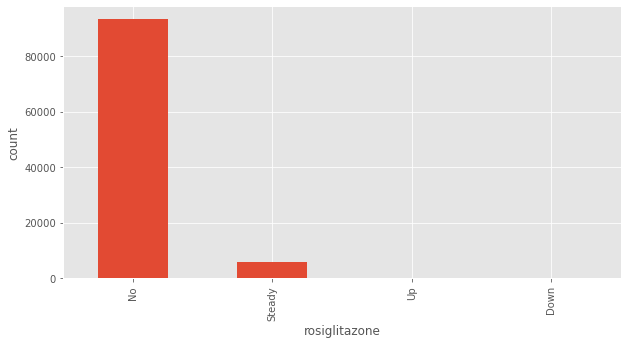

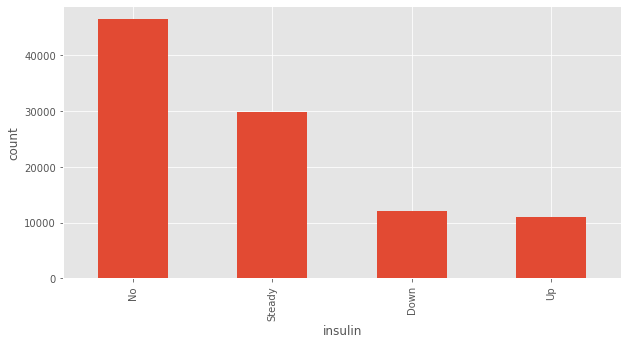

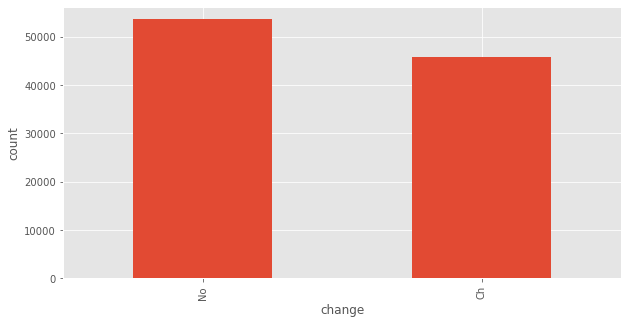

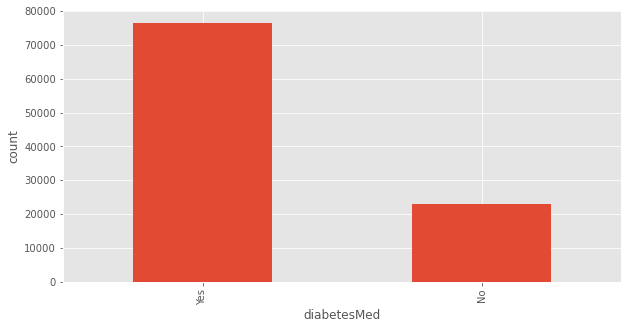

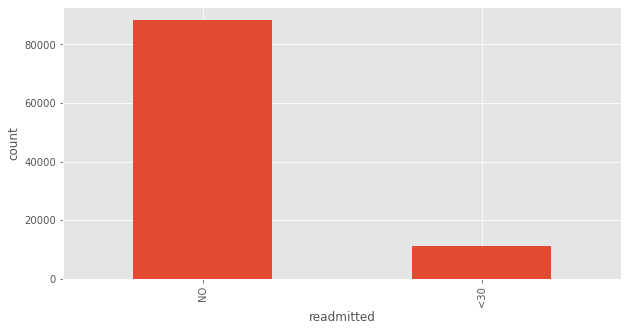

In [16]:
categorical_attr = df.select_dtypes(include=['category']).columns.to_list()
for attribute in categorical_attr:
    val = df[attribute].value_counts()
    val.plot(kind='bar', figsize=(10,5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

How the numerical feature are correlated with the class labels

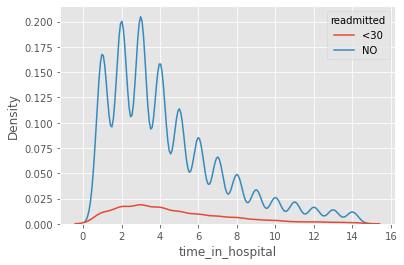

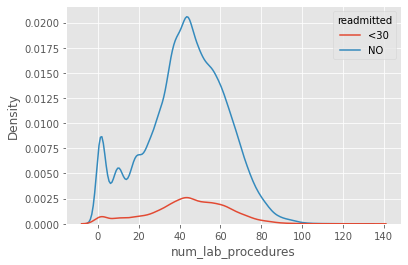

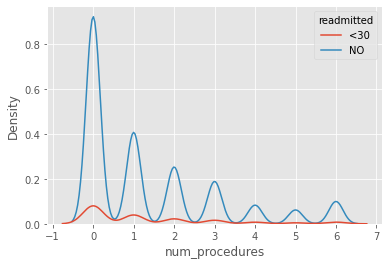

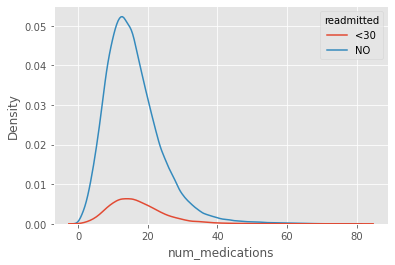

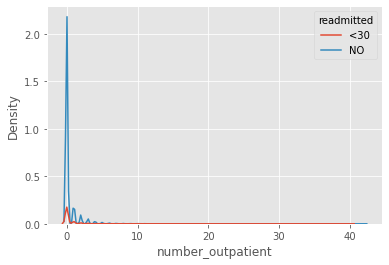

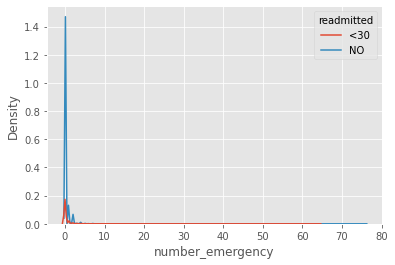

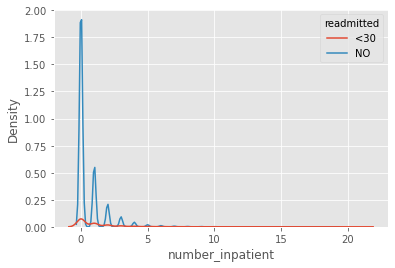

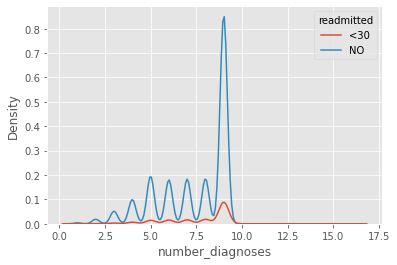

In [17]:
numericAttribute = df.select_dtypes(include=['int64']).columns.to_list()
numericAttribute.append('readmitted')

for attribute in numericAttribute:
    if attribute != 'readmitted':
        sb.kdeplot(x= df[attribute], hue= 'readmitted', data=df[numericAttribute])
        plt.show()


How the categorical feature are correlated with the class labels

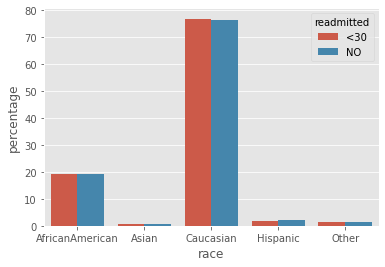

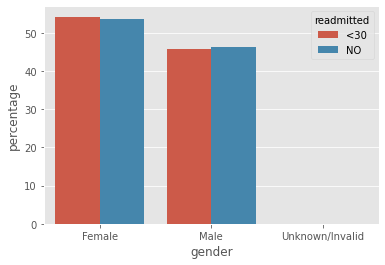

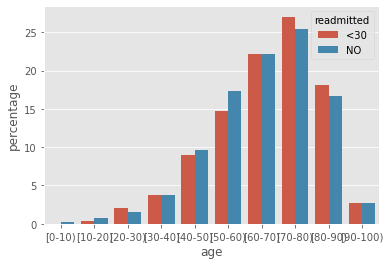

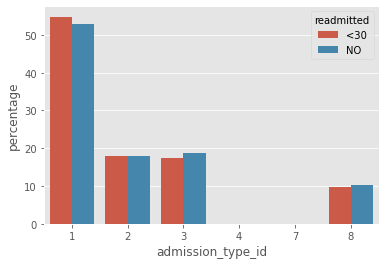

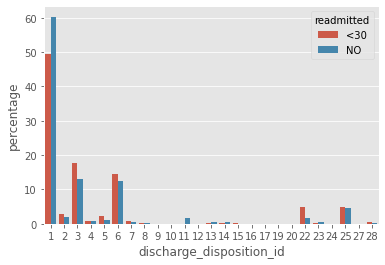

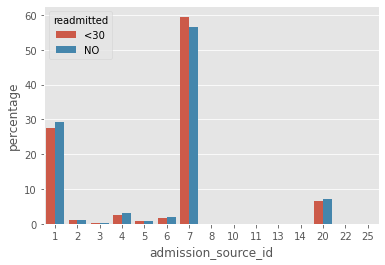

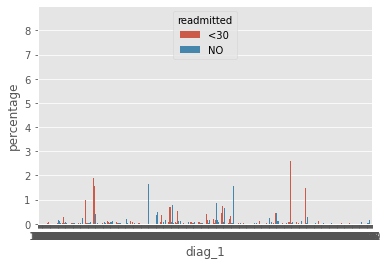

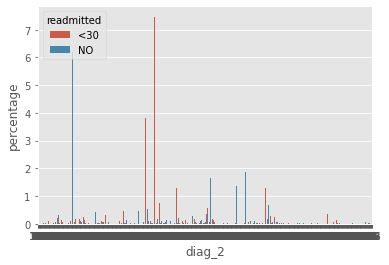

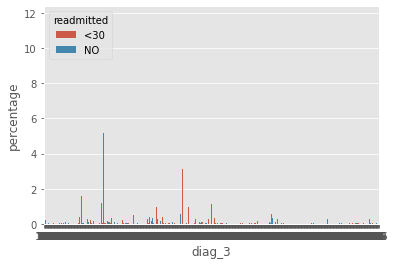

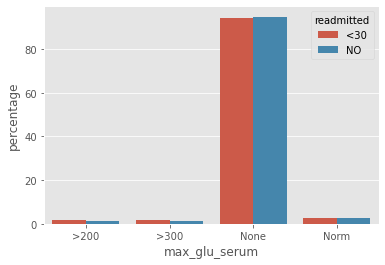

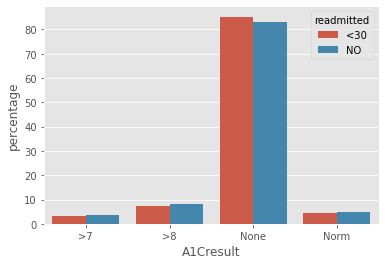

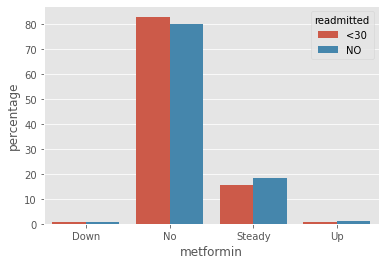

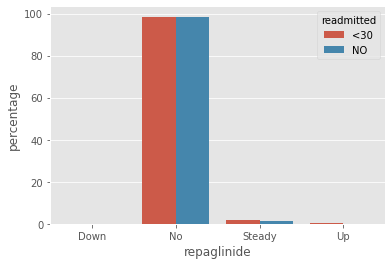

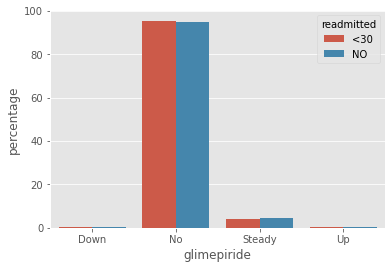

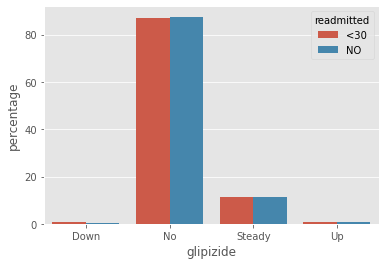

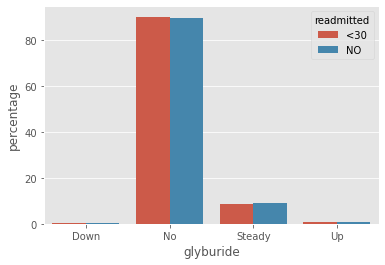

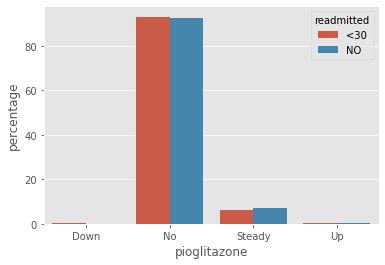

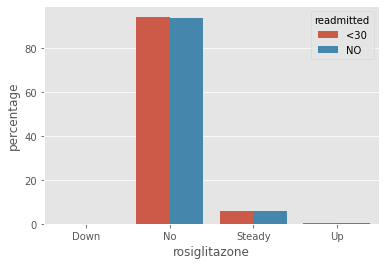

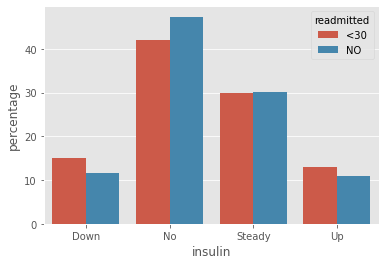

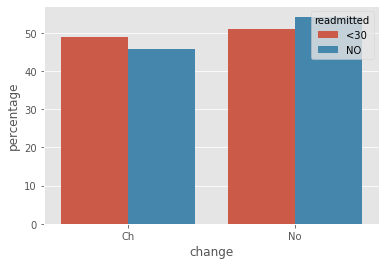

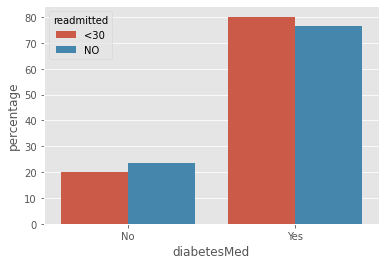

In [18]:
categoricalAttributes = df.select_dtypes(include=['category']).columns.to_list()
categoricalAttributes.append('readmitted')

for attribute in categoricalAttributes:
    if attribute != 'readmitted':
        attributeCounts = (df.groupby(['readmitted'])[attribute]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(attribute))
        p = sb.barplot(x=attribute, y="percentage", hue="readmitted", data=attributeCounts)
        plt.show()

Check the outliers

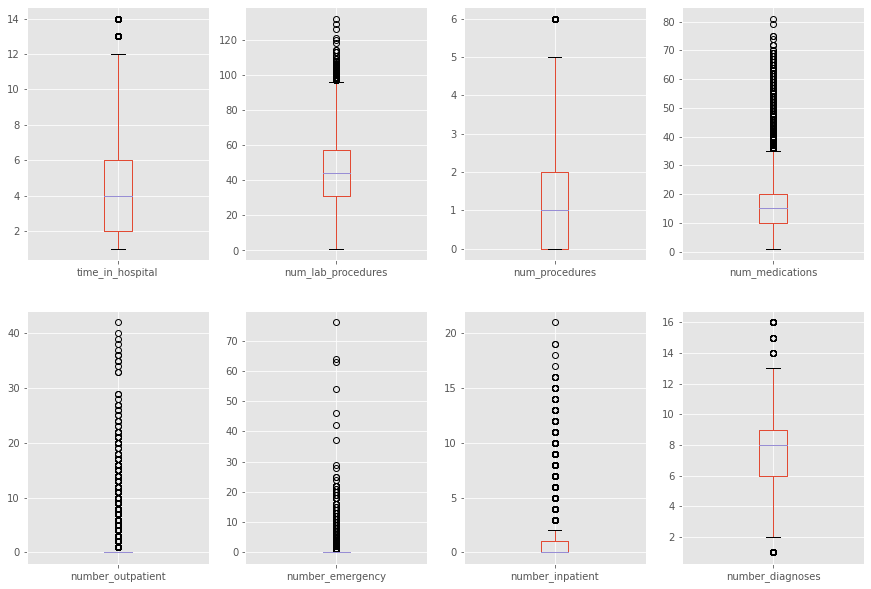

In [19]:
df.select_dtypes(include=['int64']).plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(5, 4))
plt.show()

Binarization

In [20]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('readmitted')
cat_attributes.remove('diag_1')
cat_attributes.remove('diag_2')
cat_attributes.remove('diag_3')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('diag_1')
new_attr_list.remove('diag_2')
new_attr_list.remove('diag_3')
new_attr_list.remove('readmitted')
df2 = df2[new_attr_list]

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#x_train, x_test, y_train, y_test = train_test_split(df2[new_attr_list], df['readmitted'], test_size=0.4, random_state=0)
x = np.array(df2.values)
y = np.array(df['readmitted'].values)
# define oversampling strategy

seed = 121
test_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

models = []
models.append(('KneiboarsClassifier', KNeighborsClassifier(3)))
models.append(('C45', DecisionTreeClassifier(criterion='entropy')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier( splitter="random", random_state=1, max_depth=5, max_leaf_nodes=15)))
models.append(('RandomForestClassifier', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=24)))
#models.append(('MLPClassifier',MLPClassifier(alpha=1, max_iter=1000)))
models.append(('AdaBoostClassifier',  AdaBoostClassifier()))
models.append(('GaussianNaiveBayes', GaussianNB()))
#models.append(('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()))
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, x_train_SMOTE, y_train_SMOTE, cv=kfold, scoring='accuracy')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KneiboarsClassifier: 0.864000 (0.002385)
C45: 0.886442 (0.001999)
DecisionTreeClassifier: 0.774942 (0.002533)
RandomForestClassifier: 0.820766 (0.015823)
AdaBoostClassifier: 0.903301 (0.001863)
GaussianNaiveBayes: 0.615292 (0.004966)


### **Evaluation**

##### **Do predictions on test set**

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
model = KNeighborsClassifier(3)
model.fit(x_train_SMOTE, y_train_SMOTE)
predictions = model.predict(x_test)


In [24]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.70


In [25]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

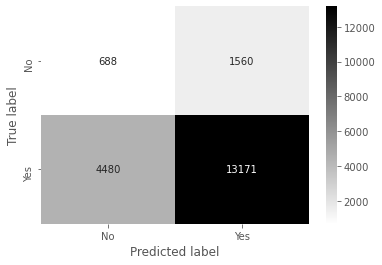

In [26]:
categories = ['No', 'Yes']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

In [27]:
print('Classification report')
print(classification_report(y_test, predictions))


Classification report
              precision    recall  f1-score   support

         <30       0.13      0.31      0.19      2248
          NO       0.89      0.75      0.81     17651

    accuracy                           0.70     19899
   macro avg       0.51      0.53      0.50     19899
weighted avg       0.81      0.70      0.74     19899



In [28]:
##### **Compute the Roc Curve for each class**

In [29]:
from sklearn.metrics import roc_curve, auc

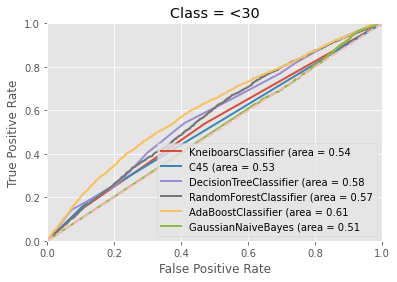

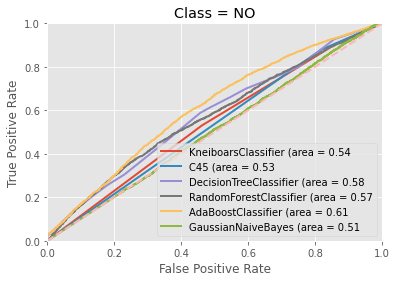

In [30]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['readmitted']))


probs = []

for  _,model in models:
    model.fit(x_train_SMOTE, y_train_SMOTE)
    probs.append(model.predict_proba(x_test))
    
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=2, label=name + f' (area = {roc_auc[i]:.2f}')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  